In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#!pip install yfinance --upgrade --no-cache-dir

In [3]:
import yfinance as yf

In [4]:
celh = yf.Ticker("CELH")

In [5]:
#celh.info

In [6]:
data = yf.download("CELH", start="2013-01-01", end="2023-12-01")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2013-01-02  0.093333  0.093333  0.073333  0.086667   0.086667   11400
2013-01-03  0.073333  0.076667  0.073333  0.076667   0.076667    2400
2013-01-04  0.073333  0.086667  0.073333  0.073333   0.073333   44700
2013-01-07  0.073333  0.073333  0.073333  0.073333   0.073333    1200
2013-01-08  0.073333  0.073333  0.073333  0.073333   0.073333     600


In [7]:
#data.to_csv('celh.csv')

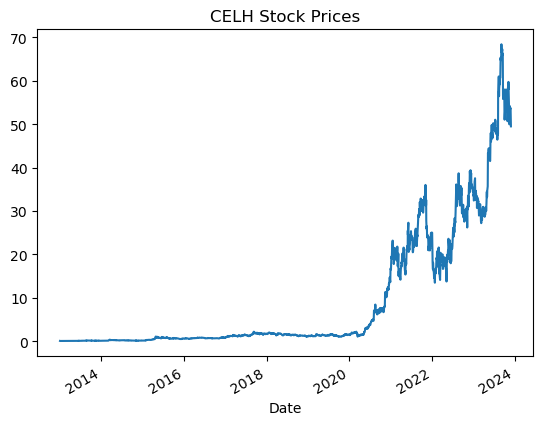

In [8]:
data['Close'].plot()
plt.title("CELH Stock Prices")
plt.show()

In [9]:
#The Problem can be seen in two ways :Classifictaion and Regression 
#Part 1 - Classifictaion :Whether someone should buy or sell the stock 
#######PART 1############

In [10]:
#Input features

data['Open-Close'] = data['Open'] - data['Close']
data['High-Low'] = data['High'] - data['Low']
data=data.dropna()


In [11]:
X = data[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2013-01-02,0.006666,0.020000
2013-01-03,-0.003334,0.003334
2013-01-04,0.000000,0.013334
2013-01-07,0.000000,0.000000
2013-01-08,0.000000,0.000000


In [12]:
#Classification :Y is target variable
#buy denoted by (+1), sell denoted by (-1)

In [13]:
y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)

In [14]:
y

array([-1, -1, -1, ..., -1, -1, -1])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

In [17]:
#using GridSearch to find the best parameter 
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)

In [18]:
#fit the model
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [19]:
accuracy_train = accuracy_score(y_train,model.predict(X_train))
accuracy_test = accuracy_score(y_test,model.predict(X_test))

In [20]:
print('Train data Accuracy :%.2f' %accuracy_train)
print('Test data Accuracy: %.2f' %accuracy_test)

Train data Accuracy :0.64
Test data Accuracy: 0.54


In [21]:
y =  data['Close']

In [22]:
y

Date
2013-01-02     0.086667
2013-01-03     0.076667
2013-01-04     0.073333
2013-01-07     0.073333
2013-01-08     0.073333
                ...    
2023-11-24    53.560001
2023-11-27    53.689999
2023-11-28    52.250000
2023-11-29    50.599998
2023-11-30    49.509998
Name: Close, Length: 2748, dtype: float64

In [23]:
#KNN Regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25)

#GridSearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg,params,cv=10)

#fit the model and make predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [25]:
print(predictions)

[25.47400001  1.54266675  0.19155554  1.51133331  1.02533326 32.07888896
 38.79088885  0.19155554  1.20488892 10.27800008  0.63200006  0.78777786
  1.2122222   0.19155554 27.49511096 37.80488841 31.73488871  0.19155554
  0.70400007 27.71599998  0.42711113 28.87088877  0.808       1.32044446
  0.19155554  1.14866667  1.45311123 26.45111109  0.4982222  25.59733384
  9.36222218 16.03266652 30.1897775   3.47800002 33.17355541 28.40888913
  1.27200007 35.05577806  1.44111112  3.89600001  0.72044446  1.33688888
  1.51688902  4.61800004  0.63488899  0.78199999  0.38333334  1.29666668
 35.94133364 37.9128891   0.19155554  1.09444447  0.72133327  5.20600009
  1.34355547 39.24977748  0.59799993  1.63111119 22.29488907 29.39577808
  2.38511114  0.33444447  1.28488894  0.80866674 27.69933351  1.12711114
 28.17466691  1.50733334 30.03666687 26.85933323  1.3695556  27.70644442
 30.24222196 32.6906662  29.21311092  0.96022227  0.82711107  1.78244447
  0.24822206 32.60155551 35.69022249  0.6911112   0

In [26]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

16.63109580483592

In [27]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [28]:
valid.head(10)

,Actual Close,Predicted Close value
Date,,
2023-01-27,33.009998,25.474000
2014-05-14,0.216667,1.542667
2013-08-15,0.133333,0.191556
2016-07-11,0.683333,1.511333
2015-12-30,0.616667,1.025333
2022-01-24,15.660000,32.078889
2022-09-08,34.993332,38.790889
2013-04-11,0.070000,0.191556
2017-02-16,1.230000,1.204889
